In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

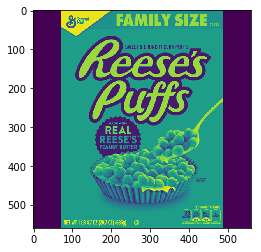

In [3]:
reeses = cv2.imread("C:/Computer Graphics/reeses_puffs.png",0)
plt.imshow(reeses)

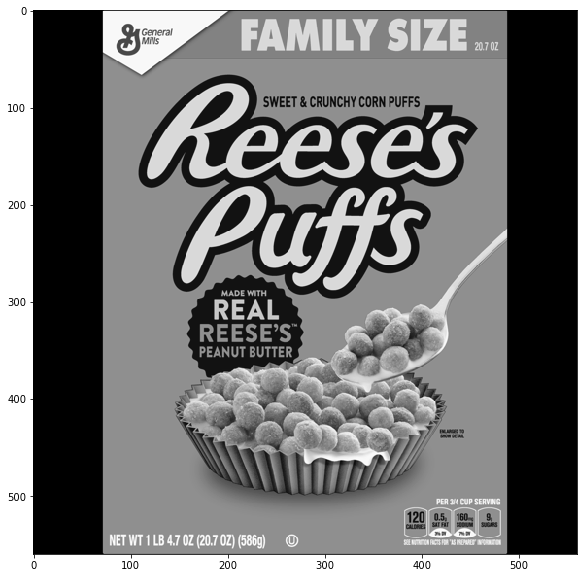

In [4]:
display(reeses)

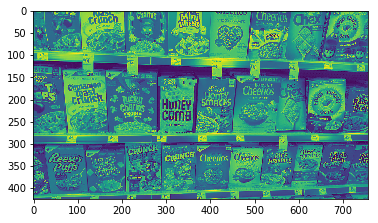

In [7]:
cereals = cv2.imread("C:/Computer Graphics/many_cereals.jpg",0)
plt.imshow(cereals)

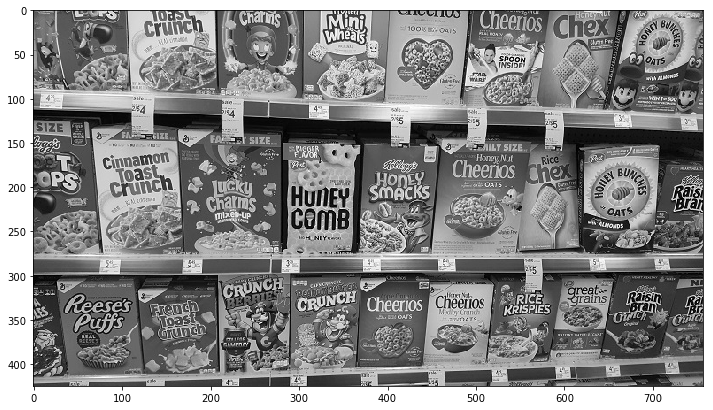

In [8]:
display(cereals)

Brute Force Detection with ORB Descriptors

In [12]:
#Initiate ORB detector
orb = cv2.ORB_create()

#this line initialize the ORB (Oriented FAST and Rotated BRIEF) detector,
#which is a feature detector and descriptor extractor

#find the keypoint and descriptors with ORB
kp1, des1=orb.detectAndCompute(reeses,None)
kp2, des2=orb.detectAndCompute(cereals,None)

#orb.detectAndCompute() finds the keypoints(distinctive image features)
#and computes their descriptors ( a vectorr representing the keypoint in a high)
#kp1 and kp2 are lists of keypoint found in the reeses and cerals images, respectively.
#dses1 and des2 are the corresponding descriptors for these keypoint

#create BFMatcher object
bf=cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

#cv2.BFMatcher is the Brute Force Detection/ Matcher object,
#which is used to match the descriptors between two images
#cv2.NORM_HAMMING specifies that the hamming distance
#should be used to compare the descriptors ( appropriate for ORB).
#crossCheck = True ensures that the matches are symmetric,
#meaning that if a descriptor in reeses matches a descriptor in cereals,
#the reverse should also be true

#Match descriptors
matches = bf.match(des1,des2)
#this  line matches the descriptors from the two images
#each matches object contain information about the matching keypoints from both images.
#Sort them in the order of their distance.

matches=sorted(matches, key=lambda x:x.distance)
#the matches are sorted based on the distance between the descriptor.
#shorter distance indicate better matches.


#draw first 25 matches.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

# cv2.drawMatches visualizes the first 25
# matches by drawing line between the matches
# flags=2 is used to draw the matches without keypoints.

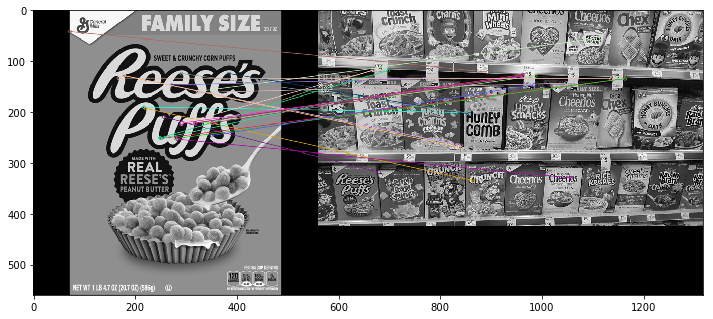

In [13]:
display(reeses_matches)

Brute-Force Matching with SIFT Description and Ratio Test SIFT (Scale-Invariant Feature Transform) Algorithm to detect and match features between two iamges (reeses and cereals)

In [15]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()
#this line initializes the SIFT detector,
#which is used for detecting keypoints and computing descriptors
#SIFT is knows for its robustness to changes in scale, rotaion and illumination

#find the keypoints and descriptors with SIFT
kp1, des1=sift.detectAndCompute(reeses,None)
kp2, des2=sift.detectAndCompute(cereals,None)

#sift.detectAndCompute() detects keypoints and computes their
#corresponding descriptors for the two images
#kp1 and kp2 are lists of keypoints detected in the reeses and cerals images, respectively.
#dses1 and des2 are the corresponding descriptors associated with these keypoints.



#BFMatcher with default params
bf=cv2.BFMatcher()
#this line creates a brute-force matcher object with default parameters
#the BFMatcher matches descriptors between the two images by finding the close

matches=bf.knnMatch(des1,des2, k=2)

#bf.knnMatch() finds the two best methods for each descriptor in des1
#(from reeses) by comparing them with all descriptors in des2 ( from cereals)
#the k=2 parameter means that for each descriptors in des1
#the teo nearest neighbors (best matches) in des2 are found.

#Apply ratio test
good=[]
for match1,match2 in matches:
    if match1.distance < 0.75* match2.distance:
        good.append([match1])
        
#the ratio test is used to filter out poor matches
#It compares the distance of the closest match ( match1) to the 
#distance of the second closest match (match2)
#if the distance of match1 is less than 0.75 times the diatance of match2,
# The match is considers "good" and added to the good list.
#the ratio test helps eliminate false matches by ensuring that
#the closest match is significnatly better than the second closest


#cv2.drawMatchesKnn expects list of Lists as matches
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

#cv2.drawMatchesKnn() draws the matches between the keypoints of the two images
#the good list is passed in as the matches to be drawn ,which
#contains the filtered from the ratio test.
#flags=2 draws the matches without drawing the keypoints themselves. 


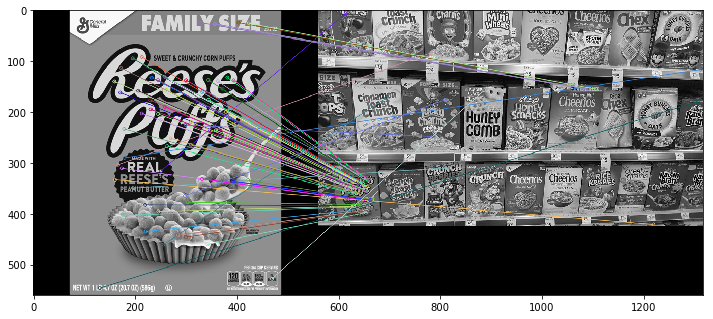

In [16]:
display(sift_matches)

FLANN based Matcher

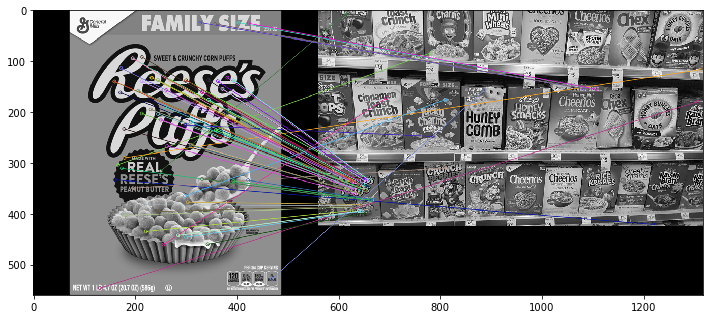

In [19]:
#Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
#this line initializes the SIFT detector,
#which is used for detecting keypoints and computing descriptors
#SIFT is knows for its robustness to changes in scale, rotaion and illumination

#find the keypoints and descriptors with SIFT
kp1, des1=sift.detectAndCompute(reeses,None)
kp2, des2=sift.detectAndCompute(cereals,None)

#FLANN Parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params=dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches=flann.knnMatch(des1,des2,k=2)

good=[]

for match1,match2 in matches:
    if match1.distance < 0.75* match2.distance:
        good.append([match1])
        
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(flann_matches)      